### Advanced regression using ridge and lasso

In [2438]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')




In [2439]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2440]:
# getting to understand the data, have to use data dictionary too
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [2441]:
df.shape


(1460, 81)

In [2442]:
#finding out percentage null values
x=round(100*(df.isnull().sum().sort_values(ascending=False)/len(df.index)), 2)
x

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
                 ...  
CentralAir        0.00
SaleCondition     0.00
Heating           0.00
TotalBsmtSF       0.00
Id                0.00
Length: 81, dtype: float64

### imputing missing values

In [2443]:
df.PoolQC.describe()

count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object

In [2444]:
df.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [2445]:
df['PoolQC'] = df['PoolQC'].fillna('NoPool')

In [2446]:
df.MiscFeature.describe()

count       54
unique       4
top       Shed
freq        49
Name: MiscFeature, dtype: object

In [2447]:
df.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [2448]:
df['MiscFeature'] = df['MiscFeature'].fillna('None')

In [2449]:
df.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [2450]:
df.Alley.describe() 

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object

In [2451]:
df['Alley']=df['Alley'].fillna('NoAlley')

In [2452]:
df.Fence.unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [2453]:
df.Fence.describe()

count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object

In [2454]:
df['Fence']=df['Fence'].fillna('NoFence')

In [2455]:
df.FireplaceQu.describe()

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

In [2456]:
df.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [2457]:
df['FireplaceQu']=df['FireplaceQu'].fillna('None')

In [2458]:
df.FireplaceQu.isnull().sum()

0

In [2459]:
#Checking for columns with only one value in entire column
x=df.columns
drop_cols=[]
for i in x:
    z=len(df[i].unique())
    if z<2:
        print(i)
        print(df[i].unique())
        drop_cols.append(i)

In [2460]:
drop_cols

[]

In [2461]:
df.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [2462]:
# we'll impute the 'LotFrontage' with median values according to the neighborhood they belong to
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda y: y.fillna(y.median()))

In [2463]:
for i in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[i] = df[i].fillna('None')

In [2464]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

GarageYrBlt     5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
                  ...   
TotRmsAbvGrd    0.000000
Functional      0.000000
Fireplaces      0.000000
FireplaceQu     0.000000
Id              0.000000
Length: 81, dtype: float64

In [2465]:
df.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [2466]:
df.GarageYrBlt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [2467]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna('0')

In [2468]:
#for ones with no basement we impute the respective columns with 'none'
for i in ('BsmtFinType2', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1','BsmtCond','BsmtExposure'):
    df[i] = df[i].fillna('None')

In [2469]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

MasVnrType     0.547945
MasVnrArea     0.547945
Electrical     0.068493
SalePrice      0.000000
Foundation     0.000000
                 ...   
Functional     0.000000
Fireplaces     0.000000
FireplaceQu    0.000000
GarageType     0.000000
Id             0.000000
Length: 81, dtype: float64

In [2470]:
#removing rows with null values less then 1%
df=df[~pd.isnull(df['MasVnrType'])]
df=df[~pd.isnull(df['MasVnrArea'])]
df=df[~pd.isnull(df['Electrical'])]

In [2471]:
df.isnull().sum().sort_values(ascending=False)

SalePrice       0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
               ..
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
FireplaceQu     0
Id              0
Length: 81, dtype: int64

In [2472]:
df.shape

(1451, 81)

In [2473]:
#now let us see the data type of variables and modify them if necessary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 81 columns):
Id               1451 non-null int64
MSSubClass       1451 non-null int64
MSZoning         1451 non-null object
LotFrontage      1451 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null object
Alley            1451 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null int64
OverallCond      1451 non-null int64
YearBuilt        1451 non-null int64
YearRemodAdd     1451 non-null int64
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non

In [2474]:
df['MSSubClass'].astype('category').value_counts()

20     532
60     296
50     144
120     86
30      69
160     63
70      60
80      57
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [2475]:
#{for categorical variables}
cat_var=df.select_dtypes(exclude=['int', 'float']).columns
cat_var

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [2476]:
#{for numerical variables}
num_var=df.select_dtypes(include=['int', 'float']).columns
num_var=num_var.drop(['Id'])
num_var

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [2477]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011119,-0.005020,-0.032789,-0.032075,0.013595,-0.016378,-0.025398,-0.049736,-0.006218,...,-0.028217,-0.005435,0.004939,-0.046455,0.002058,0.057388,-0.006025,0.019499,0.002630,-0.025188
MSSubClass,0.011119,1.000000,-0.368677,-0.138039,0.034799,-0.061147,0.027979,0.040664,0.023156,-0.069241,...,-0.012652,-0.005200,-0.010437,-0.044009,-0.026316,0.008240,-0.007773,-0.013659,-0.021583,-0.082760
LotFrontage,-0.005020,-0.368677,1.000000,0.335901,0.238144,-0.043064,0.120998,0.084356,0.196898,0.233934,...,0.088054,0.139742,0.007986,0.064891,0.041367,0.175016,0.005410,0.006840,0.005963,0.348539
LotArea,-0.032789,-0.138039,0.335901,1.000000,0.106305,-0.002297,0.015708,0.015190,0.104141,0.213081,...,0.173170,0.086278,-0.023114,0.020568,0.043498,0.077885,0.038221,0.003177,-0.012969,0.264668
OverallQual,-0.032075,0.034799,0.238144,0.106305,1.000000,-0.090940,0.572129,0.550499,0.411699,0.236421,...,0.240728,0.303215,-0.113176,0.030972,0.066271,0.065720,-0.031183,0.068514,-0.025116,0.790085
OverallCond,0.013595,-0.061147,-0.043064,-0.002297,-0.090940,1.000000,-0.376557,0.075545,-0.128333,-0.042292,...,-0.004514,-0.031432,0.074612,0.025123,0.053925,-0.002254,0.068617,-0.004210,0.043487,-0.076361
YearBuilt,-0.016378,0.027979,0.120998,0.015708,0.572129,-0.376557,1.000000,0.590324,0.316345,0.250209,...,0.226960,0.185758,-0.386748,0.032145,-0.048977,0.005368,-0.033994,0.009756,-0.014559,0.523274
YearRemodAdd,-0.025398,0.040664,0.084356,0.015190,0.550499,0.075545,0.590324,1.000000,0.180136,0.128422,...,0.207514,0.224140,-0.192185,0.046012,-0.037471,0.006198,-0.009866,0.018959,0.035263,0.507488
MasVnrArea,-0.049736,0.023156,0.196898,0.104141,0.411699,-0.128333,0.316345,0.180136,1.000000,0.264469,...,0.159754,0.125461,-0.110363,0.018752,0.061367,0.011697,-0.029854,-0.006159,-0.008147,0.477486
BsmtFinSF1,-0.006218,-0.069241,0.233934,0.213081,0.236421,-0.042292,0.250209,0.128422,0.264469,1.000000,...,0.205447,0.107279,-0.105887,0.026926,0.063139,0.141361,0.003852,-0.016387,0.016969,0.383995


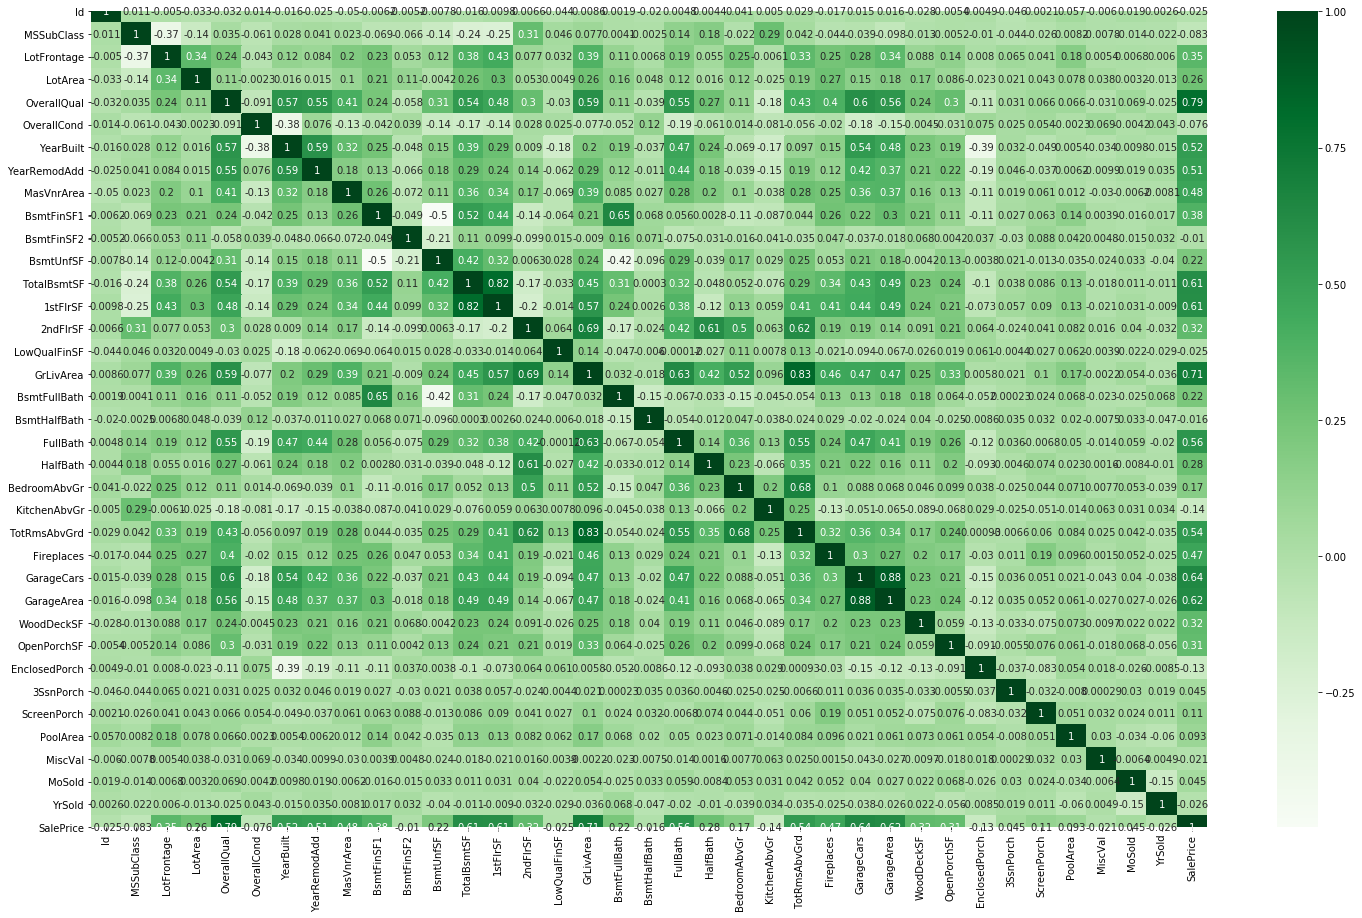

In [2478]:
plt.figure(figsize = (25, 15))
sns.heatmap(df.corr(), annot = True, cmap="Greens")
plt.show()

In [2479]:
#dropping variables which are higly correalted
df=df.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1)

In [2480]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000


In [2481]:
df.CentralAir.describe()

count     1451
unique       2
top          Y
freq      1356
Name: CentralAir, dtype: object

In [2482]:
df.CentralAir.unique()

array(['Y', 'N'], dtype=object)

In [2483]:
def binary_mapping(x):
    return x.map({'Y': 1, "N": 0})

df[['CentralAir']]=df[['CentralAir']].apply(binary_mapping)

In [2484]:
df.CentralAir.unique()

array([1, 0])

In [2485]:
num_lis=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice']
len(num_lis)

36

In [2486]:
df[df.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


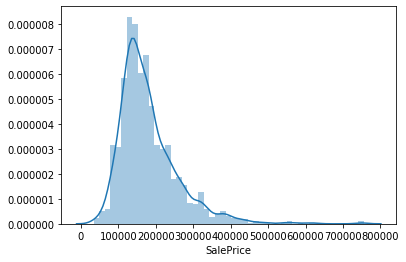

In [2487]:
sns.distplot(df['SalePrice'])

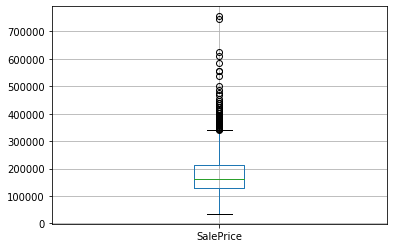

In [2488]:
#sns.boxplot(y=var,palette='cubehelix', data=df,color='r')
df.boxplot(column='SalePrice', return_type='axes');

In [2489]:
df.SalePrice.describe(percentiles=[.25,.5,.75,.90,.95,.99])

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
90%      278000.000000
95%      325812.000000
99%      439390.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [2490]:
# we see there are outliers in here, capping can be done to remove them

cap = df['SalePrice'].quantile([0.1,0.95]).values

df['SalePrice'][df['SalePrice'] <= cap[0]] = cap[0]

df['SalePrice'][df['SalePrice'] >= cap[1]] = cap[1]

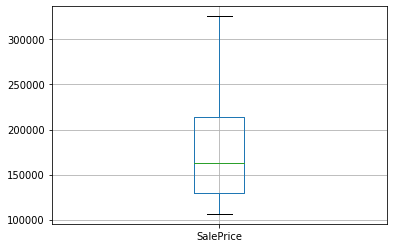

In [2491]:
df.boxplot(column='SalePrice', return_type='axes');

In [2492]:
df['SalePrice'] = np.log1p(df['SalePrice'])

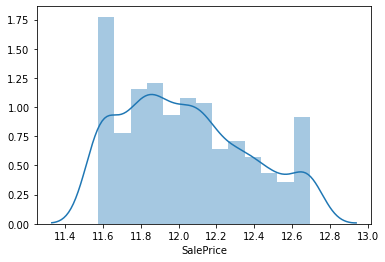

In [2493]:
sns.distplot(df['SalePrice'])

In [2494]:
df.shape

(1451, 79)

In [2495]:
num_var=df.select_dtypes(include=['int', 'float']).columns
num_var=num_var.drop(['Id'])
num_var

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [2496]:
num_lis=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

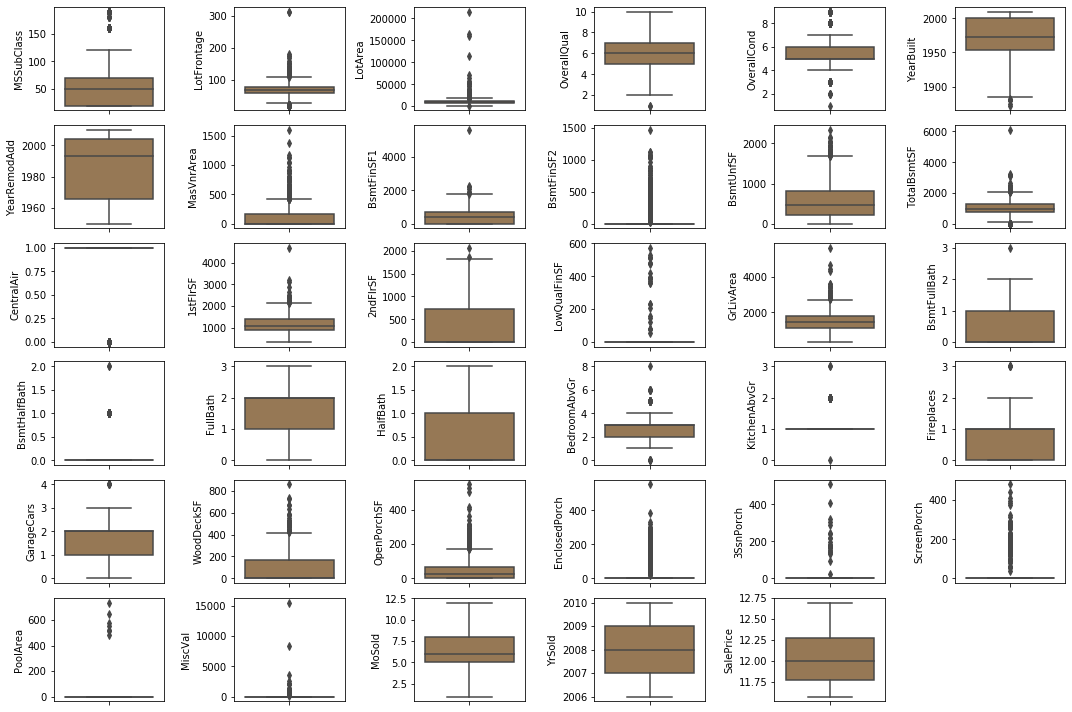

In [2497]:
def boxplot(var_list):
    plt.figure(figsize=(15,10))
    for var in var_list:
        plt.subplot(6,6,var_list.index(var)+1)
        sns.boxplot(y=var,palette='cubehelix', data=df,color='r')
    plt.tight_layout()
    plt.show()
    
boxplot(num_lis)

In [2498]:
#correlated variables with Saleprice
corr = df.corr()
corr_list = corr['SalePrice'].sort_values(axis=0,ascending=False)
corr_list

SalePrice        1.000000
OverallQual      0.812174
GrLivArea        0.693320
GarageCars       0.675694
FullBath         0.609830
YearBuilt        0.599746
TotalBsmtSF      0.598730
1stFlrSF         0.585144
YearRemodAdd     0.573285
Fireplaces       0.496662
MasVnrArea       0.420316
LotFrontage      0.349830
BsmtFinSF1       0.349827
OpenPorchSF      0.342968
WoodDeckSF       0.337253
2ndFlrSF         0.324498
HalfBath         0.314331
CentralAir       0.282668
LotArea          0.258082
BsmtUnfSF        0.232894
BsmtFullBath     0.230599
BedroomAbvGr     0.188777
ScreenPorch      0.117445
MoSold           0.067713
PoolArea         0.058351
3SsnPorch        0.056265
BsmtFinSF2      -0.000593
MiscVal         -0.014102
BsmtHalfBath    -0.020428
Id              -0.025591
YrSold          -0.028079
LowQualFinSF    -0.048443
MSSubClass      -0.076377
OverallCond     -0.086912
EnclosedPorch   -0.150115
KitchenAbvGr    -0.165623
Name: SalePrice, dtype: float64

In [2499]:
def AgeOfHouse(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['AgeOfHouse'] = df.apply(AgeOfHouse, axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeOfHouse
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,NoPool,NoFence,None,0,2,2008,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,NoPool,NoFence,None,0,5,2007,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,NoPool,NoFence,None,0,9,2008,WD,Normal,12.317171,6
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,NoPool,NoFence,None,0,2,2006,WD,Abnorml,11.849405,36
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,NoPool,NoFence,None,0,12,2008,WD,Normal,12.429220,8


In [2500]:
df=df.drop(['YearBuilt','YearRemodAdd','YrSold'], axis=1)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,AgeOfHouse
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,2,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,5,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,9,WD,Normal,12.317171,6
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,2,WD,Abnorml,11.849405,36
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,12,WD,Normal,12.429220,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,8,WD,Normal,12.072547,7
1456,1457,20,RL,85.0,13175,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,MnPrv,None,0,2,WD,Normal,12.254868,22
1457,1458,70,RL,66.0,9042,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,GdPrv,Shed,2500,5,WD,Normal,12.493133,4
1458,1459,20,RL,68.0,9717,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,4,WD,Normal,11.864469,14


In [2501]:
# Outlier Treatment

cap_LotArea = df['LotArea'].quantile(0.97)
df = df[df["LotArea"] < cap_LotArea]

cap_MasVnrArea = df['MasVnrArea'].quantile(0.97)
df = df[df["MasVnrArea"] < cap_MasVnrArea]

cap_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.97)
df = df[df["TotalBsmtSF"] < cap_TotalBsmtSF]

cap_WoodDeckSF = df['WoodDeckSF'].quantile(0.97)
df = df[df["WoodDeckSF"] < cap_WoodDeckSF]

cap_OpenPorchSF = df['OpenPorchSF'].quantile(0.97)
df = df[df["OpenPorchSF"] < cap_OpenPorchSF]

In [2502]:
num_lis

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [2503]:
df.GarageYrBlt.unique()

array([2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993.0, 2004.0, 1931.0,
       1939.0, 1965.0, 2005.0, 1962.0, 2006.0, 1991.0, 1970.0, 1967.0,
       1958.0, 1930.0, 2002.0, 2008.0, 1920.0, 1966.0, 2007.0, 1959.0,
       1953.0, '0', 1983.0, 1977.0, 1997.0, 1985.0, 1963.0, 1964.0,
       1999.0, 1973.0, 1935.0, 1990.0, 1945.0, 1987.0, 1989.0, 1915.0,
       1956.0, 1948.0, 1974.0, 1995.0, 1950.0, 1961.0, 1921.0, 1900.0,
       1979.0, 2009.0, 1954.0, 1969.0, 1968.0, 1936.0, 1975.0, 1971.0,
       1923.0, 1984.0, 1926.0, 1986.0, 1957.0, 1916.0, 1932.0, 1972.0,
       1980.0, 1924.0, 1960.0, 1988.0, 1996.0, 1940.0, 1949.0, 1994.0,
       1910.0, 1978.0, 1981.0, 1982.0, 1951.0, 1992.0, 1925.0, 1955.0,
       1941.0, 1927.0, 1947.0, 1937.0, 1942.0, 1938.0, 1952.0, 1928.0,
       1922.0, 1934.0, 1906.0, 2010.0, 1946.0, 1914.0, 1929.0, 1933.0],
      dtype=object)

In [2504]:
df['GarageYrBlt']=df['GarageYrBlt'].astype('int')

In [2505]:
def GarageAge(row):
    if row == 0:
        return 0
    elif row < 2000:        
        return('old')
    else:   
        return('new')
    
df['GarageAge'] = df['GarageYrBlt'].apply(GarageAge)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,AgeOfHouse,GarageAge
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,NoPool,NoFence,None,0,2,WD,Normal,12.247699,5,new
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,NoPool,NoFence,None,0,5,WD,Normal,12.109016,31,old
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,NoPool,NoFence,None,0,9,WD,Normal,12.317171,6,new
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,NoPool,NoFence,None,0,2,WD,Abnorml,11.849405,36,old
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,NoPool,NoFence,None,0,12,WD,Normal,12.429220,8,new


In [2506]:
df=df.drop(['GarageYrBlt'], axis=1)

In [2507]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,AgeOfHouse,GarageAge
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,NoPool,NoFence,None,0,2,WD,Normal,12.247699,5,new
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,NoPool,NoFence,None,0,5,WD,Normal,12.109016,31,old
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,NoPool,NoFence,None,0,9,WD,Normal,12.317171,6,new
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,NoPool,NoFence,None,0,2,WD,Abnorml,11.849405,36,old
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,NoPool,NoFence,None,0,12,WD,Normal,12.429220,8,new


In [2508]:
def ploy_mapping(x):

    return x.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })

poly_coll=['ExterQual','BsmtQual','HeatingQC','KitchenQual','FireplaceQu']

df[poly_coll]=df[poly_coll].apply(ploy_mapping)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,AgeOfHouse,GarageAge
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,NoPool,NoFence,None,0,2,WD,Normal,12.247699,5,new
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,NoPool,NoFence,None,0,5,WD,Normal,12.109016,31,old
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,NoPool,NoFence,None,0,9,WD,Normal,12.317171,6,new
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,NoPool,NoFence,None,0,2,WD,Abnorml,11.849405,36,old
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,NoPool,NoFence,None,0,12,WD,Normal,12.429220,8,new


In [2509]:
dum_cols=df.select_dtypes(exclude=['int', 'float']).columns
dum_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition', 'GarageAge'],
      dtype='object')

In [2510]:
dum_var = pd.get_dummies(df[dum_cols], drop_first=True)

df = pd.concat([df, dum_var], axis=1)
df.shape

(1243, 275)

In [2511]:
df=df.drop(dum_cols,axis=1)

In [2512]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageAge_new,GarageAge_old
0,1,60,65.0,8450,7,5,196.0,4,4,706,...,0,0,1,0,0,0,1,0,1,0
1,2,20,80.0,9600,6,8,0.0,3,4,978,...,0,0,1,0,0,0,1,0,0,1
2,3,60,68.0,11250,7,5,162.0,4,4,486,...,0,0,1,0,0,0,1,0,1,0
3,4,70,60.0,9550,7,5,0.0,3,3,216,...,0,0,1,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,350.0,4,4,655,...,0,0,1,0,0,0,1,0,1,0


In [2513]:
adf=df.copy()

#### now lets split the data into train and test sets

In [2514]:
from sklearn.model_selection import train_test_split
X = df.drop(['Id','SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageAge_new,GarageAge_old
0,60,65.0,8450,7,5,196.0,4,4,706,0,...,0,0,1,0,0,0,1,0,1,0
1,20,80.0,9600,6,8,0.0,3,4,978,0,...,0,0,1,0,0,0,1,0,0,1
2,60,68.0,11250,7,5,162.0,4,4,486,0,...,0,0,1,0,0,0,1,0,1,0
3,70,60.0,9550,7,5,0.0,3,3,216,0,...,0,0,1,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,350.0,4,4,655,0,...,0,0,1,0,0,0,1,0,1,0


In [2515]:
y = df['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [2516]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=50)

#### scaling the data

In [2517]:
sc_coll=X_train.select_dtypes(include=['int', 'float']).columns
sc_coll

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Fireplaces', 'FireplaceQu', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'AgeOfHouse'],
      dtype='object')

In [2518]:
poly_coll

['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu']

In [2519]:
#sc_coll=sc_coll.drop(['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu'])


In [2520]:
sc_coll

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Fireplaces', 'FireplaceQu', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'AgeOfHouse'],
      dtype='object')

In [2521]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()


X_train[sc_coll] = scale.fit_transform(X_train[sc_coll])

X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageAge_new,GarageAge_old
508,0.270240,-0.417803,0.118799,0.838109,2.990186,-0.637958,-0.629403,-0.422053,-0.676392,-0.302251,...,0,0,1,0,0,0,1,0,0,1
1345,-0.652659,-0.921075,-0.946811,-1.506439,-1.396765,-0.637958,-0.629403,-0.422053,-0.400043,-0.302251,...,0,0,1,0,0,0,1,0,0,1
562,-0.652659,-0.266821,1.393682,-0.724923,0.358016,-0.637958,-0.629403,-0.422053,-0.298630,-0.302251,...,0,0,1,0,0,0,1,0,0,0
1274,-0.191210,-0.770094,-1.135660,-0.724923,0.358016,-0.637958,-0.629403,-0.422053,-1.033870,-0.302251,...,0,0,1,0,0,0,1,0,0,1
113,-0.883384,0.286779,3.493228,0.056593,-0.519375,0.806597,-0.629403,0.680608,-0.945135,5.466333,...,0,0,0,0,0,0,0,0,0,1


In [2522]:
X_test[sc_coll] = scale.fit_transform(X_test[sc_coll])

X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageAge_new,GarageAge_old
147,0.054592,-0.124638,0.149570,0.758151,-0.553472,1.019818,1.153155,0.650948,-0.983923,-0.243601,...,0,0,1,0,0,0,1,0,1,0
1311,-0.909330,0.038199,-0.071276,0.758151,-0.553472,0.127130,1.153155,0.650948,1.370115,-0.243601,...,1,0,0,0,0,0,0,1,1,0
123,1.500475,-0.667430,-0.365950,-0.004087,-0.553472,-0.587020,1.153155,0.650948,-0.220452,-0.243601,...,0,0,1,0,0,0,1,0,0,1
1252,-0.909330,-0.287476,0.262390,-0.766325,0.424941,-0.587020,-0.692883,-0.647467,0.313979,-0.243601,...,0,0,1,0,0,0,1,0,0,1
797,-0.909330,-0.558872,-0.434664,-0.766325,-0.553472,-0.587020,-0.692883,-0.647467,0.466673,-0.243601,...,0,0,1,0,0,0,0,0,0,1


In [2523]:
X_train.select_dtypes(exclude=['int','float']).columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'Alley_NoAlley', 'Alley_Pave', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'GarageAge_new', 'GarageAge_old'],
      dtype='object', length=198)

In [2524]:
X_train.isnull().sum().sort_values(ascending=False)

GarageAge_old           0
Neighborhood_OldTown    0
Condition1_RRAe         0
Condition1_PosN         0
Condition1_PosA         0
                       ..
Foundation_Slab         0
Foundation_PConc        0
Foundation_CBlock       0
ExterCond_TA            0
MSSubClass              0
Length: 235, dtype: int64

#### using RFE to do coarse tuning

In [2525]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2526]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 25)            
rfe = rfe.fit(X_train, y_train)

In [2527]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 151),
 ('LotFrontage', False, 208),
 ('LotArea', False, 107),
 ('OverallQual', False, 36),
 ('OverallCond', False, 133),
 ('MasVnrArea', False, 173),
 ('ExterQual', False, 199),
 ('BsmtQual', False, 137),
 ('BsmtFinSF1', False, 9),
 ('BsmtFinSF2', False, 24),
 ('BsmtUnfSF', False, 21),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 171),
 ('CentralAir', False, 203),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 8),
 ('GrLivArea', False, 6),
 ('BsmtFullBath', False, 192),
 ('BsmtHalfBath', False, 194),
 ('FullBath', False, 143),
 ('HalfBath', False, 144),
 ('BedroomAbvGr', False, 196),
 ('KitchenAbvGr', False, 140),
 ('KitchenQual', False, 136),
 ('Fireplaces', False, 156),
 ('FireplaceQu', False, 157),
 ('GarageCars', False, 122),
 ('WoodDeckSF', False, 180),
 ('OpenPorchSF', False, 190),
 ('EnclosedPorch', False, 205),
 ('3SsnPorch', False, 161),
 ('ScreenPorch', False, 177),
 ('PoolArea', False, 22),
 ('MiscVal', False, 119),
 ('MoS

In [2528]:
col = X_train.columns[rfe.support_]
col

Index(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_Veenker',
       'Condition1_RRAe', 'Condition2_RRAe', 'BldgType_Duplex',
       'HouseStyle_2.5Unf', 'HouseStyle_SFoyer', 'RoofMatl_Metal',
       'Exterior1st_BrkComm', 'Exterior2nd_Brk Cmn', 'BsmtCond_Po',
       'BsmtFinType1_None', 'BsmtFinType2_None', 'Heating_OthW',
       'Electrical_Mix', 'Functional_Typ', 'GarageCond_Gd', 'GarageCond_TA',
       'SaleType_ConLw', 'GarageAge_new'],
      dtype='object')

In [2529]:
X_train=X_train[col]
X_train.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,LandSlope_Sev,Neighborhood_Crawfor,Neighborhood_NPkVill,Neighborhood_Veenker,Condition1_RRAe,Condition2_RRAe,BldgType_Duplex,...,BsmtCond_Po,BsmtFinType1_None,BsmtFinType2_None,Heating_OthW,Electrical_Mix,Functional_Typ,GarageCond_Gd,GarageCond_TA,SaleType_ConLw,GarageAge_new
508,-0.810015,-1.291993,0.842161,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1345,-0.063027,-0.445455,-0.807852,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
562,0.036204,-0.333000,-0.807852,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1274,-0.887195,-1.379458,0.602681,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
113,2.277169,3.612306,-0.807852,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [2530]:
X_train_l=X_train.copy()
X_test_l=X_test.copy()

In [2531]:
X_test=X_test[col]
X_test.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,LandSlope_Sev,Neighborhood_Crawfor,Neighborhood_NPkVill,Neighborhood_Veenker,Condition1_RRAe,Condition2_RRAe,BldgType_Duplex,...,BsmtCond_Po,BsmtFinType1_None,BsmtFinType2_None,Heating_OthW,Electrical_Mix,Functional_Typ,GarageCond_Gd,GarageCond_TA,SaleType_ConLw,GarageAge_new
147,-0.371898,-0.678319,2.013828,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1311,0.773148,0.538539,-0.778283,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
123,0.552947,0.304528,-0.778283,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1252,-0.430618,-0.709520,-0.778283,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
797,-0.697795,-1.024655,-0.778283,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [2532]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

### Ridge regression

In [2533]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [2534]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002531,0.000507,0.001002,0.000058,0.0001,{'alpha': 0.0001},-0.131647,-0.107079,-0.109617,-0.092018,...,-0.112317,0.013414,16,-0.102452,-0.107453,-0.107488,-0.111582,-0.105024,-0.106800,0.003027
1,0.002258,0.000071,0.000998,0.000046,0.001,{'alpha': 0.001},-0.131646,-0.107072,-0.109616,-0.092018,...,-0.112314,0.013414,15,-0.102453,-0.107455,-0.107491,-0.111585,-0.105026,-0.106802,0.003028
2,0.002288,0.000083,0.000978,0.000016,0.01,{'alpha': 0.01},-0.131640,-0.107005,-0.109610,-0.092016,...,-0.112290,0.013413,14,-0.102465,-0.107476,-0.107520,-0.111617,-0.105053,-0.106826,0.003034
3,0.002291,0.000085,0.000967,0.000048,0.1,{'alpha': 0.1},-0.131588,-0.106429,-0.109585,-0.092001,...,-0.112095,0.013410,12,-0.102577,-0.107680,-0.107738,-0.111858,-0.105263,-0.107023,0.003072
4,0.002243,0.000097,0.000953,0.000030,0.2,{'alpha': 0.2},-0.131538,-0.105978,-0.109560,-0.092092,...,-0.111958,0.013376,10,-0.102727,-0.107872,-0.107976,-0.112116,-0.105437,-0.107226,0.003109
5,0.001886,0.000206,0.000812,0.000093,0.3,{'alpha': 0.3},-0.131487,-0.105888,-0.109532,-0.092197,...,-0.111918,0.013322,8,-0.102865,-0.108068,-0.108167,-0.112317,-0.105622,-0.107408,0.003128
6,0.001895,0.000157,0.000811,0.000086,0.4,{'alpha': 0.4},-0.131437,-0.105853,-0.109503,-0.092292,...,-0.111896,0.013271,7,-0.102990,-0.108273,-0.108316,-0.112464,-0.105778,-0.107564,0.003137
7,0.001876,0.000206,0.000807,0.000082,0.5,{'alpha': 0.5},-0.131390,-0.105816,-0.109479,-0.092389,...,-0.111878,0.013223,6,-0.103104,-0.108467,-0.108454,-0.112585,-0.105907,-0.107703,0.003142
8,0.001952,0.000177,0.000814,0.000077,0.6,{'alpha': 0.6},-0.131345,-0.105783,-0.109469,-0.092479,...,-0.111864,0.013178,5,-0.103209,-0.108639,-0.108575,-0.112689,-0.106019,-0.107826,0.003145
9,0.002081,0.000444,0.000838,0.000083,0.7,{'alpha': 0.7},-0.131302,-0.105750,-0.109457,-0.092562,...,-0.111851,0.013136,4,-0.103315,-0.108793,-0.108680,-0.112779,-0.106117,-0.107937,0.003143


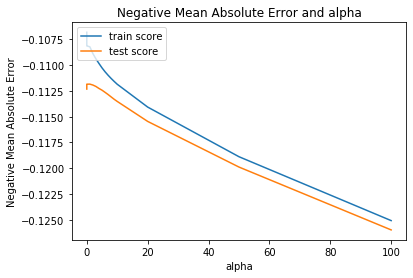

In [2535]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [2536]:
#lets take alpha=1
ridge = Ridge(alpha=1)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.09950734,  0.12186102,  0.16229332, -0.0970135 ,  0.1439483 ,
        0.04759627,  0.19191503, -0.12434616, -0.06458026, -0.23185062,
       -0.29167982,  0.13579863,  0.21463329, -0.11050173, -0.06290545,
        0.09831392,  0.07622909,  0.07622909, -0.15699912, -0.0469351 ,
        0.1133353 ,  0.17349513,  0.12620117,  0.18313044,  0.19533684])

In [2537]:
coef = pd.Series(ridge.coef_, index = X_train.columns)
coef

TotalBsmtSF             0.099507
1stFlrSF                0.121861
2ndFlrSF                0.162293
LandSlope_Sev          -0.097014
Neighborhood_Crawfor    0.143948
Neighborhood_NPkVill    0.047596
Neighborhood_Veenker    0.191915
Condition1_RRAe        -0.124346
Condition2_RRAe        -0.064580
BldgType_Duplex        -0.231851
HouseStyle_2.5Unf      -0.291680
HouseStyle_SFoyer       0.135799
RoofMatl_Metal          0.214633
Exterior1st_BrkComm    -0.110502
Exterior2nd_Brk Cmn    -0.062905
BsmtCond_Po             0.098314
BsmtFinType1_None       0.076229
BsmtFinType2_None       0.076229
Heating_OthW           -0.156999
Electrical_Mix         -0.046935
Functional_Typ          0.113335
GarageCond_Gd           0.173495
GarageCond_TA           0.126201
SaleType_ConLw          0.183130
GarageAge_new           0.195337
dtype: float64

In [2538]:
mean_squared_error(y_test, ridge.predict(X_test))

0.021797341238461488

#### mean squared error for ridge = 0.0218

In [2539]:
#now we'll see what happens when we double alpha 
ridge = Ridge(alpha=2)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.09816393,  0.12225771,  0.16110045, -0.06056081,  0.13772691,
        0.03001963,  0.17266431, -0.11216663, -0.04533622, -0.22148371,
       -0.24803646,  0.12615773,  0.13054398, -0.07913704, -0.04911741,
        0.05461344,  0.07011636,  0.07011636, -0.10481782, -0.01852491,
        0.11100287,  0.13733977,  0.12433562,  0.13663951,  0.1948593 ])

In [2540]:
mean_squared_error(y_test, ridge.predict(X_test))

0.021412937521480695

In [2541]:
coef = pd.Series(ridge.coef_, index = X_train.columns)
coef

TotalBsmtSF             0.098164
1stFlrSF                0.122258
2ndFlrSF                0.161100
LandSlope_Sev          -0.060561
Neighborhood_Crawfor    0.137727
Neighborhood_NPkVill    0.030020
Neighborhood_Veenker    0.172664
Condition1_RRAe        -0.112167
Condition2_RRAe        -0.045336
BldgType_Duplex        -0.221484
HouseStyle_2.5Unf      -0.248036
HouseStyle_SFoyer       0.126158
RoofMatl_Metal          0.130544
Exterior1st_BrkComm    -0.079137
Exterior2nd_Brk Cmn    -0.049117
BsmtCond_Po             0.054613
BsmtFinType1_None       0.070116
BsmtFinType2_None       0.070116
Heating_OthW           -0.104818
Electrical_Mix         -0.018525
Functional_Typ          0.111003
GarageCond_Gd           0.137340
GarageCond_TA           0.124336
SaleType_ConLw          0.136640
GarageAge_new           0.194859
dtype: float64

#### here the mean square error value is decreased when alpha is doubled

### Lasso regression

In [2542]:
lasso = Lasso()

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}
folds = 5
lasso_model = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [2543]:
lasso_model_results = pd.DataFrame(lasso_model.cv_results_)

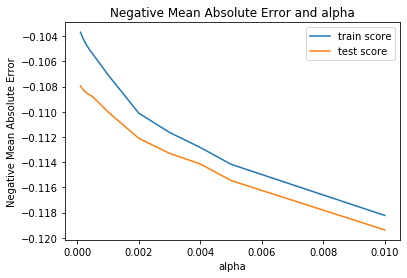

In [2544]:

# plotting mean test and train scoes with alpha 

lasso_model_results['alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [2545]:
# lets take alpha=0.001
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [2546]:
lasso.coef_

array([ 0.08460655,  0.12964433,  0.15683385, -0.        ,  0.1109963 ,
        0.        ,  0.10710937, -0.02488877, -0.        , -0.18865958,
       -0.15672926,  0.08258897,  0.        , -0.        , -0.        ,
        0.        ,  0.05314053,  0.        , -0.        , -0.        ,
        0.10137709,  0.        ,  0.11369546,  0.        ,  0.19559314])

In [2547]:
mean_squared_error(y_test, lasso.predict(X_test))

0.02155663093548664

In [2548]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
coef.sort_values(ascending=False)

GarageAge_new           0.195593
2ndFlrSF                0.156834
1stFlrSF                0.129644
GarageCond_TA           0.113695
Neighborhood_Crawfor    0.110996
Neighborhood_Veenker    0.107109
Functional_Typ          0.101377
TotalBsmtSF             0.084607
HouseStyle_SFoyer       0.082589
BsmtFinType1_None       0.053141
BsmtFinType2_None       0.000000
GarageCond_Gd           0.000000
Electrical_Mix         -0.000000
LandSlope_Sev          -0.000000
Heating_OthW           -0.000000
Neighborhood_NPkVill    0.000000
Condition2_RRAe        -0.000000
BsmtCond_Po             0.000000
SaleType_ConLw          0.000000
Exterior1st_BrkComm    -0.000000
Exterior2nd_Brk Cmn    -0.000000
RoofMatl_Metal          0.000000
Condition1_RRAe        -0.024889
HouseStyle_2.5Unf      -0.156729
BldgType_Duplex        -0.188660
dtype: float64

#### mean squared error for lasso = 0.0215

In [2549]:
# now let us check what happens if we double the alpha value
alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 


Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [2550]:
lasso.coef_

array([ 0.0796619 ,  0.13070679,  0.15253208, -0.        ,  0.07451208,
        0.        ,  0.        , -0.        , -0.        , -0.13583072,
       -0.00338931,  0.02332028,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.08466761,  0.        ,  0.10775329,  0.        ,  0.1931625 ])

In [2551]:
mean_squared_error(y_test, lasso.predict(X_test))

0.022747689245394987

In [2552]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
coef.sort_values(ascending=False)

GarageAge_new           0.193162
2ndFlrSF                0.152532
1stFlrSF                0.130707
GarageCond_TA           0.107753
Functional_Typ          0.084668
TotalBsmtSF             0.079662
Neighborhood_Crawfor    0.074512
HouseStyle_SFoyer       0.023320
Heating_OthW           -0.000000
Condition2_RRAe        -0.000000
GarageCond_Gd           0.000000
Electrical_Mix         -0.000000
LandSlope_Sev          -0.000000
Neighborhood_NPkVill    0.000000
Neighborhood_Veenker    0.000000
Condition1_RRAe        -0.000000
RoofMatl_Metal          0.000000
BsmtFinType2_None       0.000000
SaleType_ConLw          0.000000
Exterior1st_BrkComm    -0.000000
Exterior2nd_Brk Cmn    -0.000000
BsmtCond_Po             0.000000
BsmtFinType1_None       0.000000
HouseStyle_2.5Unf      -0.003389
BldgType_Duplex        -0.135831
dtype: float64

#### if we double the value of alpha there is increase in mean squared error

### alpha value for ridge=1
### alpha value for lasso=0.001

### mean squared error for ridge = 0.0218
### mean squared error for lasso = 0.0215

## its better to choose Lasso beacuse of feature elimination